In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
conn=mysql.connector.connect(
    host="localhost",
    user="root",
    password="Study@2319",
    database="ecommerce")

In [5]:
basket_df = pd.read_sql("select * from basket_details",conn)
customer_df = pd.read_sql("select * from customer_details",conn)

In [6]:
basket_df.head()
# customer_df.head()

,customer_id,product_id,basket_data,basket_count,basket_id
0,4897641,34525548,2019-06-15,2,15153
1,11623549,50394038,2019-06-18,2,15850
2,11665521,41476812,2019-06-15,2,15977
3,4193819,6455162,2019-06-15,2,15999
4,1030589,38578121,2019-05-26,2,16190


In [7]:
basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   72 non-null     int64 
 1   product_id    72 non-null     int64 
 2   basket_data   72 non-null     object
 3   basket_count  72 non-null     int64 
 4   basket_id     72 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19992 entries, 0 to 19991
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   customer_id   19992 non-null  int64 
 1   sex           19992 non-null  object
 2   customer_age  19992 non-null  int64 
 3   tenure        19992 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 624.9+ KB


In [9]:
customer_df.shape
basket_df.shape

(72, 5)

In [10]:
customer_df.isnull().sum()
basket_df.isnull().sum()

customer_id     0
product_id      0
basket_data     0
basket_count    0
basket_id       0
dtype: int64

In [11]:
customer_df.duplicated().sum()
basket_df.duplicated().sum()

np.int64(0)

In [12]:
customer_df.nunique()
basket_df.nunique()

customer_id     64
product_id      72
basket_data     25
basket_count     2
basket_id       72
dtype: int64

In [13]:
basket_df['basket_data']=pd.to_datetime(basket_df['basket_data'])
basket_df['basket_data']

0    2019-06-15
1    2019-06-18
2    2019-06-15
3    2019-06-15
4    2019-05-26
        ...    
67   2019-05-24
68   2019-05-22
69   2019-05-21
70   2019-06-01
71   2019-05-27
Name: basket_data, Length: 72, dtype: datetime64[ns]

In [14]:
customer_df.dtypes
basket_df.dtypes

customer_id              int64
product_id               int64
basket_data     datetime64[ns]
basket_count             int64
basket_id                int64
dtype: object

In [15]:
customer_df.rename(columns={'sex':'gender'},inplace=True)
basket_df.rename(columns={'basket_data':'basket_date'},inplace=True)

In [16]:
customer_df.describe()
basket_df.describe()

,customer_id,product_id,basket_date,basket_count,basket_id
count,7.200000e+01,7.200000e+01,72,72.000000,72.000000
mean,1.554364e+07,3.140376e+07,2019-05-31 09:20:00,2.152778,22765.972222
min,3.809750e+05,8.287500e+04,2019-05-20 00:00:00,2.000000,15153.000000
25%,1.026443e+07,2.980404e+07,2019-05-24 00:00:00,2.000000,18655.750000
50%,1.352736e+07,3.498005e+07,2019-05-27 00:00:00,2.000000,23618.500000
75%,2.037478e+07,4.359420e+07,2019-06-09 00:00:00,2.000000,26237.250000
max,4.328080e+07,5.130767e+07,2019-06-19 00:00:00,3.000000,29895.000000
std,9.961282e+06,1.616160e+07,NaN,0.362298,4538.042815


In [17]:
merged_df=pd.merge(basket_df,customer_df,on='customer_id',how='inner')
merged_df

,customer_id,product_id,basket_date,basket_count,basket_id,gender,customer_age,tenure
0,4897641,34525548,2019-06-15,2,15153,Male,40,114
1,11623549,50394038,2019-06-18,2,15850,Male,30,63
2,11665521,41476812,2019-06-15,2,15977,Female,51,62
3,4193819,6455162,2019-06-15,2,15999,Male,42,117
4,1030589,38578121,2019-05-26,2,16190,Male,45,127
...,...,...,...,...,...,...,...,...
67,15192667,31272089,2019-05-24,2,29183,Male,46,37
68,22524187,43154303,2019-05-22,2,29279,Male,27,20
69,14248059,48790153,2019-05-21,2,29327,Male,29,41
70,10629563,47864502,2019-06-01,2,29416,Male,29,76


In [18]:
# Total customers
merged_df['customer_id'].nunique()


64

In [19]:
# Total baskets
merged_df['basket_id'].nunique()

72

In [20]:
# Total products sold
merged_df['basket_count'].sum()

np.int64(155)

In [21]:
# Time range of orders
merged_df['basket_date'].min(),merged_df['basket_date'].max()

(Timestamp('2019-05-20 00:00:00'), Timestamp('2019-06-19 00:00:00'))

In [22]:
# Gender-wise total products sold
merged_df.groupby('gender')['basket_count'].sum()

gender
Female     33
Male      122
Name: basket_count, dtype: int64

In [23]:
# Average basket count by age
merged_df.groupby('customer_age')['basket_count'].mean()

customer_age
5       2.000000
22      2.500000
23      2.000000
24      2.500000
25      2.000000
26      2.000000
27      2.250000
28      2.000000
29      2.166667
30      2.000000
32      2.250000
33      2.000000
34      2.000000
35      2.000000
36      2.000000
37      2.000000
39      2.333333
40      2.400000
41      2.000000
42      2.000000
43      2.333333
45      2.000000
46      2.000000
51      2.333333
55      3.000000
57      2.000000
61      2.000000
67      2.000000
123     2.000000
2022    2.000000
Name: basket_count, dtype: float64

In [24]:
# Monthly basket trend
merged_df['month']=merged_df['basket_date'].dt.to_period('M')
merged_df.groupby('month')['basket_id'].nunique()

month
2019-05    43
2019-06    29
Freq: M, Name: basket_id, dtype: int64

In [25]:
# Find which products are most frequently bought:
top_products = merged_df.groupby('product_id')['basket_count'].sum().sort_values(ascending=False).head(10)
top_products

product_id
35058279    3
6059073     3
38610580    3
39329175    3
43524799    3
35375120    3
46373374    3
6616058     3
35722328    3
3213654     3
Name: basket_count, dtype: int64

In [26]:
# Find your most active customers:
top_customer = merged_df.groupby('customer_id')['basket_count'].sum().sort_values(ascending=False).head(10)
top_customer

customer_id
39814593    5
20236456    5
12737235    5
380975      4
27081691    4
22524187    4
21765975    4
537173      4
10619833    3
34677755    3
Name: basket_count, dtype: int64

month
2019-05    Axes(0.125,0.11;0.775x0.77)
2019-06    Axes(0.125,0.11;0.775x0.77)
Freq: M, Name: basket_count, dtype: object

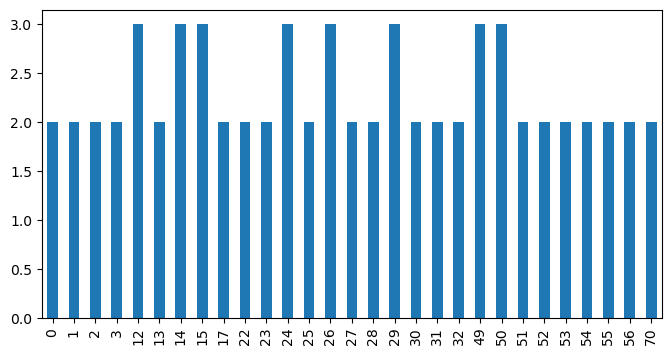

In [27]:
# Monthly Trend
# You already added month, so visualize baskets by month:
merged_df.groupby('month')['basket_count'].plot(kind='bar',figsize=(8,4))

<Axes: xlabel='gender'>

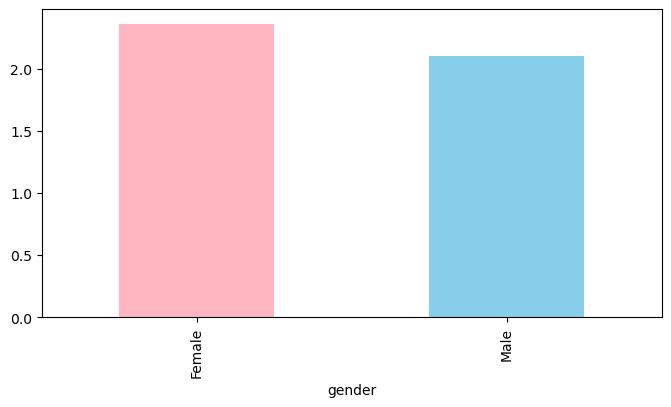

In [28]:
# average baskets by gender
merged_df.groupby('gender')['basket_count'].mean().plot(kind='bar',color=['lightpink','skyblue'],figsize=(8,4))

<Axes: xlabel='age_group'>

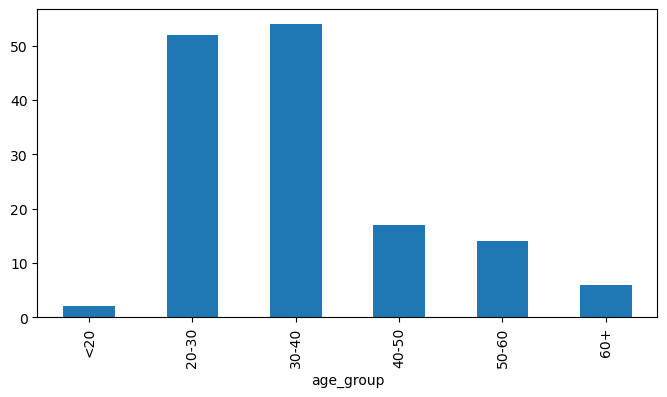

In [29]:
bins=[0,20,30,40,50,60,100]
labels=['<20','20-30','30-40','40-50','50-60','60+']
merged_df['age_group'] = pd.cut(merged_df['customer_age'],bins=bins,labels=labels)
merged_df['age_group']
# which age group buys the most
merged_df.groupby('age_group')['basket_count'].sum().plot(kind='bar',figsize=(8,4))

<Axes: xlabel='tenure_group'>

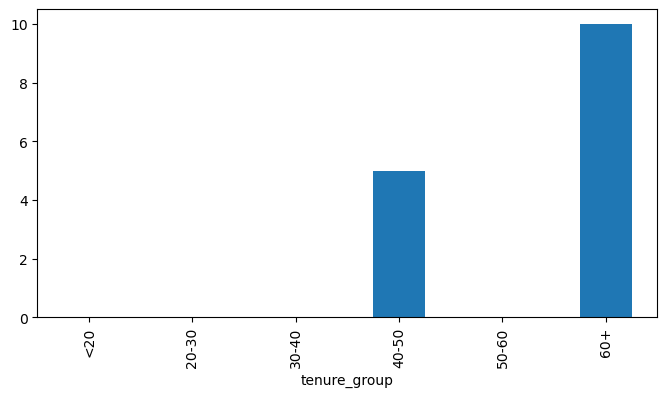

In [30]:
# Check total baskets by tenure (how long the customer has been with you):
bins = [0,1,2,3,4,5,10]
lables = ['<1yr','1-2yr','2-3yr','3-4yr','4-5yr','5+yr']
merged_df['tenure_group'] = pd.cut(merged_df['tenure'],bins=bins,labels=labels)
merged_df.groupby('tenure_group')['basket_count'].sum().plot(kind='bar',figsize=(8,4))

In [31]:
# Ecommerce cleaned dataframe download for dashboard
merged_df.to_csv('ecommerce_cleaned.csv',index=False)